xgboost 설치

pip install xgboost

In [63]:
# 경고 메시지가 안나오게..

import warnings
warnings.filterwarnings('ignore')


# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

### 머신러닝 프로젝트
- 데이터 수집 : csv, 엑셀, spss 일 경우에는 다운로드. json, xml 이라면 bs4, feedparser, json 등등으로 수집한다. IoT 를 활용하는 경우, 설문조사 등등.
- 데이터 준비 : DataFrame 생성(pandas)
- 데이터 전처리(분석) : 이상치, 결측치, 극단치에 대한 처리(pandas)
- 데이터 분석 : 데이터의 패턴을 읽어 사람이 분석(pandas, matplotlib, seaborn)
- 데이터 전처리(머신러닝) : 문자열 -> 숫자, 표준화 작업 등등....
- 학습 모델 선정 : 하이퍼 파라미터 튜닝, 교차검증 등등..
- 전체 데이터를 학습
- 파일로 저장
- 예측결과 도출

### 데이터 준비
- 파일 형태도 저장되어 있는 데이터를 읽어와 데이터 프레임을 생성한다.
- 데이터 프레임 생성이 성공했다면 데이터에 대한 구조적인 문제는 없다.


In [14]:
df1 = pd.read_csv('data/breast_cancer.csv')
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


### 데이터 전처리
- 숫자 -> 문자열 : 성별과 같은 레이블형 데이터가 숫자로 되어 있을 경우 문자로 바꿔주는 작업
- 결측치 처리 : 측정되지 않은 데이터(na로 표시된다). 제거나 대체
- 이상치 처리 : 이상한 데이터, 제거나 대체
- 극단치 처리 : 정상 범위안에 있지만 다른 데이터와 너무 동떨어져 있는 데이터, 확인후 처리


In [17]:
# 결측치 확인
df1.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [22]:
# 이상치 확인 - 범위형( 요약 통계정보를 통해 최대, 최소값을 확인한다)
# df1[['mean radius', 'mean texture', 'mean perimeter']].describe()
df1.drop('target', axis=1).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,14.238905,18.993546,92.730242,664.322467,0.096487,0.105110,0.091516,0.050412,0.182325,0.062650,...,16.454692,25.418216,108.471674,899.414537,0.132571,0.258257,0.278676,0.117255,0.294012,0.084039
std,3.504169,4.086344,24.141851,348.078392,0.013708,0.053874,0.080785,0.039188,0.028152,0.007001,...,4.839541,6.053046,33.508663,565.690629,0.023038,0.162589,0.212250,0.066918,0.064539,0.018437
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.770000,16.020000,75.472500,427.925000,0.086740,0.065308,0.028835,0.020362,0.162250,0.057645,...,13.060000,20.865000,84.465000,517.875000,0.116600,0.147350,0.111900,0.063228,0.253075,0.071270
50%,13.470000,18.680000,87.090000,560.100000,0.096515,0.093020,0.066575,0.035450,0.180650,0.061325,...,15.060000,25.205000,98.385000,698.750000,0.131550,0.215700,0.232000,0.101900,0.284150,0.080090
75%,16.130000,21.555000,106.525000,804.600000,0.105400,0.130600,0.135250,0.077468,0.196600,0.065895,...,19.537500,29.257500,128.950000,1172.500000,0.146475,0.345700,0.391800,0.171100,0.320675,0.092173
max,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
# 이상치 확인 - 레이블형 데이터
df1['target'].value_counts()

benign       268
malignant    186
Name: target, dtype: int64

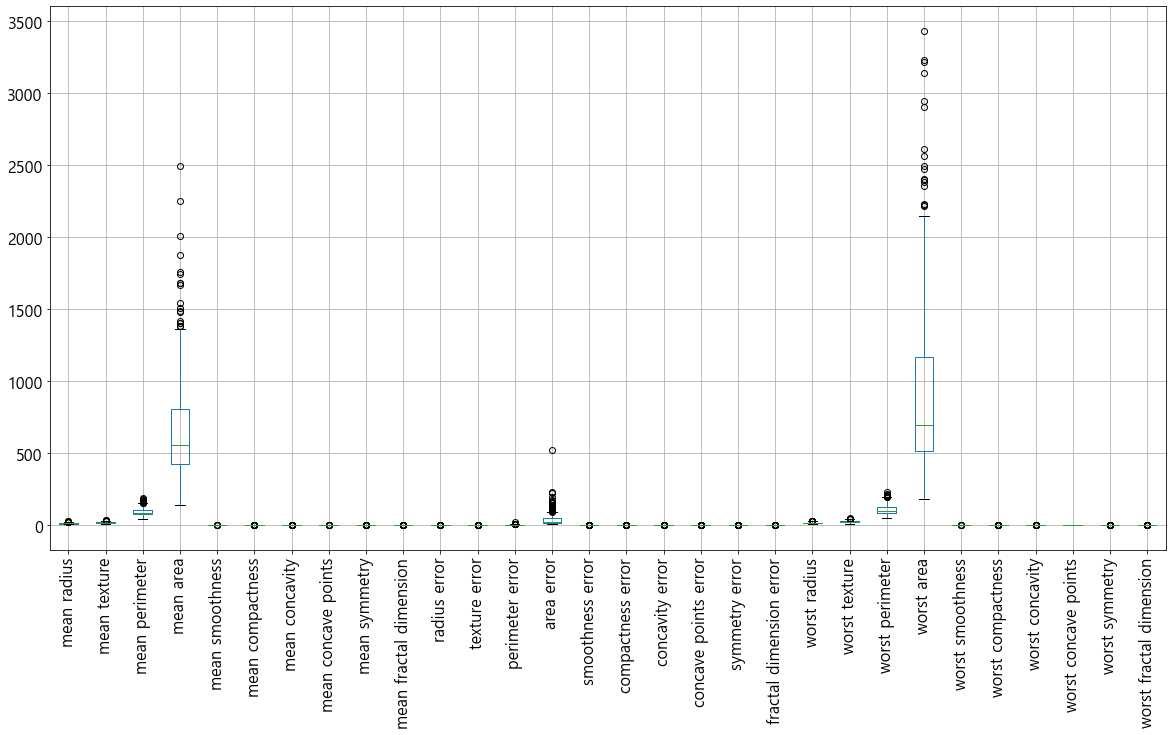

In [26]:
# 범위형 ㅔ이터들에 대해 극단치를 확인한다.
df1.drop('target',axis=1).boxplot(rot=90)
plt.show()

### 머신러닝을 위한 데이터 전처리
- 문자열 -> 숫자
- 표준화 작업 : 모든 컬럼의 데이터에 대한 표준편차를 비슷한 수준으로 맞추는 작업


In [27]:
# 입력과 결과로 나눈다.
x = df1.drop('target', axis=1)
y = df1['target']

display(x)
display(y)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
449    malignant
450       benign
451    malignant
452       benign
453       benign
Name: target, Length: 454, dtype: object

In [29]:
encoder1 = LabelEncoder()
encoder1.fit(y)

y = encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [30]:
scaler1 = StandardScaler()
scaler1.fit(x)
x = scaler1.transform(x)
x


array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

## 학습 모델 선정

### KNN
- 최 근접 이웃
- 학습 과정이 데이터를 저장하는 것으로 끝난다.
- 주변의 데이터를 확인하여 결과를 예측한다.
- 속도가 빠르지만 주변만 바라보기 때문에 다른 모델에 비해서 성능이 떨어질 수도 있다.
- 이웃의 개수가 너무 많으면 편향의 오류가 발생할 가능성이 높다
- 하이퍼 파라미터 튜닝 : 성능을 향상시키는 것도 있지만 편향의 오류를 예방하는 효과도 있다.
- 성능은 어느정도 타협을 볼 수 있고 속도가 중요한 경우.


<pre>
이웃의 수가 많으면 새로 들어오는 데이터는 무조건 그걸로만 인식하는 문제가 있을수 있음
knn 은 이웃의 갯수를 최소화시켜 편향의 오류를 예방하는게 하이퍼 파라미터 튜닝의 목적

성능은 잘나올 수 있으나 다른거에 비해 예측정확도가 떨어질 수 있음
예측 정확도가 조금 떨어져도 속도가 나는 최고다 라고 생각하면 knn 이 최선임 가장 베스트

만약 knn 써서 정확도랑 성능이 만족스럽다면 다른거 쳐다볼 필요도 없음
</pre>

In [32]:
#KFold 생성 : 교차 검증을 위해 데이터 구성을 하는 작업
fold1 = StratifiedKFold(n_splits=10)

In [50]:
# 하이퍼파라미터 튜닝
params = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

model1 =KNeighborsClassifier()
grid1  =GridSearchCV( model1, param_grid=params, scoring='accuracy', cv = fold1)
grid1.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 9}
최적의 모델 평균 성능 : 0.9670531400966184


### 선형 모델
- 선형 회귀 기법을 이용해 데이터간의 경계선을 찾는 방식으로 학습한다.
- LogisticRegrssion : 경계선과 가장 가까운 데이터와의 거리가 먼 선을 찾는다.
- SVM : 경계선과 가장 가까운 데이터와의 거리가 가까운 선을 찾는다.
- 적당한 속도와 적당한 성능을 보인다.
- 하이퍼 파라미터 튜닝 : 규제 강도를 튜닝한다. 규제가 약해지면 편향의 오류가 발생하고 규제가 강해지면 과적합이 발생할 수 있다.



학습시간이 빠르다 느리다의 기준은 선형모델임

In [51]:
params = {
    # 값이 크면 규제가 약해지고, 값이 작으면 규제가 강해진다.
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 =LogisticRegression()
grid2  =GridSearchCV( model2, param_grid=params, scoring='accuracy', cv = fold1)
grid2.fit(x,y)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 0.1}
최적의 모델 평균 성능 : 0.9779227053140097


In [37]:
params = {
    # 값이 크면 규제가 약해지고, 값이 작으면 규제가 강해진다.
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = SVC()
grid3 = GridSearchCV(model3, param_grid=params, scoring='accuracy', cv=fold1)
grid3.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')

최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.9648792270531402


### 결정트리
- 데이터를 보고 질문을 생성하여 학습하는 알고리즘
- 학습 과정에서 질문을 생성하기 때문에 학습 시간이 오래걸린다.
- 예측 과정에서 질문을 통과해야 하기 때문에 예측 시간이 오래걸린다.
- 앞서 살펴본 모델에 비해 성능이 높게 나타날 가능성이 높다.
- 단 결정트리를 학습 데이터에 최적화(과적합)되는 모델이므로 사용에 주의해야 한다.
- 하이퍼 파라미터 튜닝 : 질문이 무한정 생성되어 학습과 예측이 오래걸리는 것을 예방한다.


<pre>
결정트리의 하이퍼 파라미터 튜닝의 목적은 학습을 중단시키는게 목적임
학습을  계속 할수록 시간이 걸리고 과적합되기때문에
하이퍼 파라미터 튜닝을 하고나면 성능이 더 떨어질 수도 있음
정확도가 높아지지않으면 더 질문 생성할 필요가없음

In [38]:
params = {
    # 질문 깊이
    'max_depth' : [None, 1,2,3,4,5,6,7,8,9,10]
}

model4 = DecisionTreeClassifier()
grid4 = GridSearchCV(model4, param_grid=params, scoring='accuracy', cv=fold1)
grid4.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None}
최적의 모델 평균 성능 : 0.9339613526570048


### 앙상블 
- 하나의 모델이 아닌 다수의 모델을 사용하여 학습하고 예측하는 알고리즘
- 과적합된 알고리즘을 모아 각 알고리즘이 던지는 예측 결과들을 취합하여 최종 결과를 예측하는 알고리즘
- 랜덤 포레스트 : 다수의 트리를 모아 학습하고 예측하는 알고리즘
- 부스팅 : 랜덤 포레스트 기법과 비슷하다. 한번의 학습과 예측이 아닌 어긋나게 예측한 결과에 대해 보정작업을 해서 랜덤 포레스트보다 정확도가 높게 나타날 확률이 있는 알고리즘
- 다른 모델들에 비해 성능이 높을 확률이 높지만 속도는 매우 오래 걸린다.
- 하이퍼 파라미터 튜닝 : 성능 향상, 속도 조절


<pre>
앙상블은 과적합된 알고리즘을 모아 각 알고리즘이 던지는 예측 결과들을 취합하여 최종 결과를 예측하는 알고리즘


In [40]:
params = {
    # 트리의 개수
    'n_estimators':[10,50,100,150,200],
    # 질문 깊이
    'max_depth' : [None, 1,2,3,4,5,6,7,8,9,10]
}

model5 = RandomForestClassifier()
grid5 = GridSearchCV(model5, param_grid=params, scoring='accuracy', cv=fold1)
grid5.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid5.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 7, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.962657004830918


In [41]:
params = {
    # 트리의 개수
    'n_estimators' : [10, 50, 100, 150, 200],
    # 질문 깊이
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model6 = GradientBoostingClassifier()
grid6 = GridSearchCV(model6, param_grid=params, scoring='accuracy', cv=fold1)
grid6.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid6.best_score_}')


최적의 하이퍼 파라미터 : {'max_depth': 1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.9626086956521739


In [44]:
params = {
    # 트리의 개수
    'n_estimators' : [10, 50, 100, 150, 200],
    # 질문 깊이
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = XGBClassifier(silent=True, verbosity=0, tree_method= 'gpu_hist')
grid7 = GridSearchCV(model7, param_grid=params, scoring='accuracy', cv=fold1)
grid7.fit(x, y)
print(f'최적의 하이퍼 파라미터 : {grid7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid7.best_score_}')


최적의 하이퍼 파라미터 : {'max_depth': 1, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.9626086956521739


In [47]:
best1 = gird1.best_estimator_
best2 = gird2.best_estimator_
best3 = grid3.best_estimator_
best4 = grid4.best_estimator_
best5 = grid5.best_estimator_
best6 = grid6.best_estimator_
best7 = grid7.best_estimator_

In [49]:
print(best1)
print(best2)
print(best3)
print(best4)
print(best5)
print(best6)
print(best7)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
          

In [56]:
# 교차검증
r1 = cross_val_score(best1, x, y, scoring='accuracy', cv=fold1 )
r2 = cross_val_score(best2, x, y, scoring='accuracy', cv=fold1 )
r3 = cross_val_score(best3, x, y, scoring='accuracy', cv=fold1 )
r4 = cross_val_score(best4, x, y, scoring='accuracy', cv=fold1 )
r5 = cross_val_score(best5, x, y, scoring='accuracy', cv=fold1 )
r6 = cross_val_score(best6, x, y, scoring='accuracy', cv=fold1 )
r7 = cross_val_score(best7, x, y, scoring='accuracy', cv=fold1 )

print(r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())
print(r5.mean())
print(r6.mean())
print(r7.mean())


0.9670531400966184
0.9779227053140097
0.9648792270531402
0.9207246376811595
0.9537681159420289
0.9626086956521739
0.9626086956521739


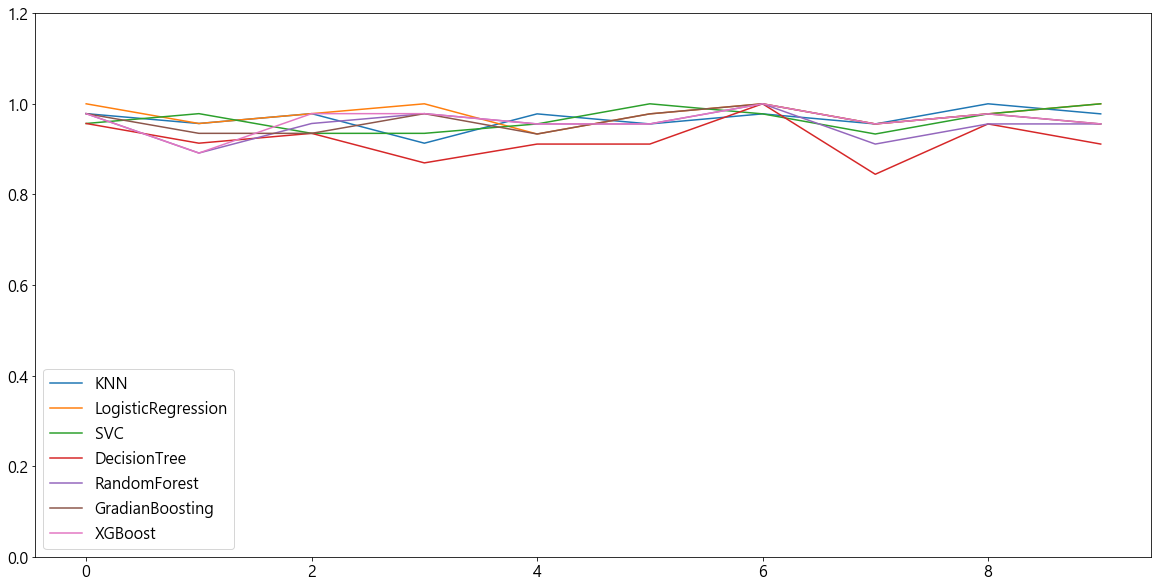

In [60]:
plt.plot(r1, label='KNN')
plt.plot(r2, label='LogisticRegression')
plt.plot(r3, label='SVC')
plt.plot(r4, label='DecisionTree')
plt.plot(r5, label='RandomForest')
plt.plot(r6, label='GradianBoosting')
plt.plot(r7, label='XGBoost')
plt.ylim(0,1.2)
plt.legend()
plt.show()

### 전체 데이터 학습

In [61]:
best2.fit(x,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# 학습한 데이터를 통해 평가를 실시한다.
pred1 = best2.predict(x)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [65]:
result1 = accuracy_score( y, pred1)
result1

0.9845814977973568

### 학습이 완료된 모델을 저장한다.

In [66]:
with open('model.dat','wb') as fp:
    pickle.dump(encoder1, fp)
    pickle.dump(scaler1, fp)
    pickle.dump(best2, fp)
    
print('저장 완료')

저장 완료


## 예측 결과 추측

In [67]:
df2 = pd.read_csv( 'data/breast_cancer_new.csv')
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291


In [69]:
# 알고리즘 복원
with open('model.dat', 'rb') as fp:
    new_encoder1 = pickle.load(fp)
    new_scaler1 = pickle.load(fp)
    new_model1 = pickle.load(fp)

print(new_encoder1)
print(new_scaler1)
print(new_model1)

LabelEncoder()
StandardScaler(copy=True, with_mean=True, with_std=True)
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [70]:
y2 = new_scaler1.transform(df2)
y2

array([[-0.46250369, -0.45164581, -0.50218195, ..., -0.28043066,
         0.5116929 , -0.5831113 ],
       [-0.24537993,  2.87283471, -0.26498762, ..., -0.59279929,
        -1.15425761, -0.39577673],
       [-0.74533596,  2.52250257, -0.7406203 , ..., -0.7316298 ,
        -0.08705654, -0.64284116],
       ...,
       [ 0.67453917,  2.22606768,  0.64563954, ...,  0.3671957 ,
        -1.12013199, -0.31704191],
       [ 1.81729582,  2.53230207,  1.96430728, ...,  2.21029035,
         1.77899418,  2.16989242],
       [-1.85095302,  1.3588119 , -1.85817047, ..., -1.75415837,
        -0.10722167, -0.74112394]])

In [72]:
pred2 = new_model1.predict(y2)
pred2

In [74]:
a1 = new_model1.predict_proba(y2)
proba_df = pd.DataFrame(a1, columns = ['0','1'])
proba_df['target'] = pred2
proba_df

,0,1,target
0,9.695840e-01,0.030416,0
1,4.769654e-01,0.523035,1
2,6.499798e-01,0.350020,0
3,8.501220e-01,0.149878,0
4,9.097042e-01,0.090296,0
...,...,...,...
110,1.519423e-05,0.999985,1
111,2.894264e-04,0.999711,1
112,4.681448e-02,0.953186,1
113,5.824667e-07,0.999999,1


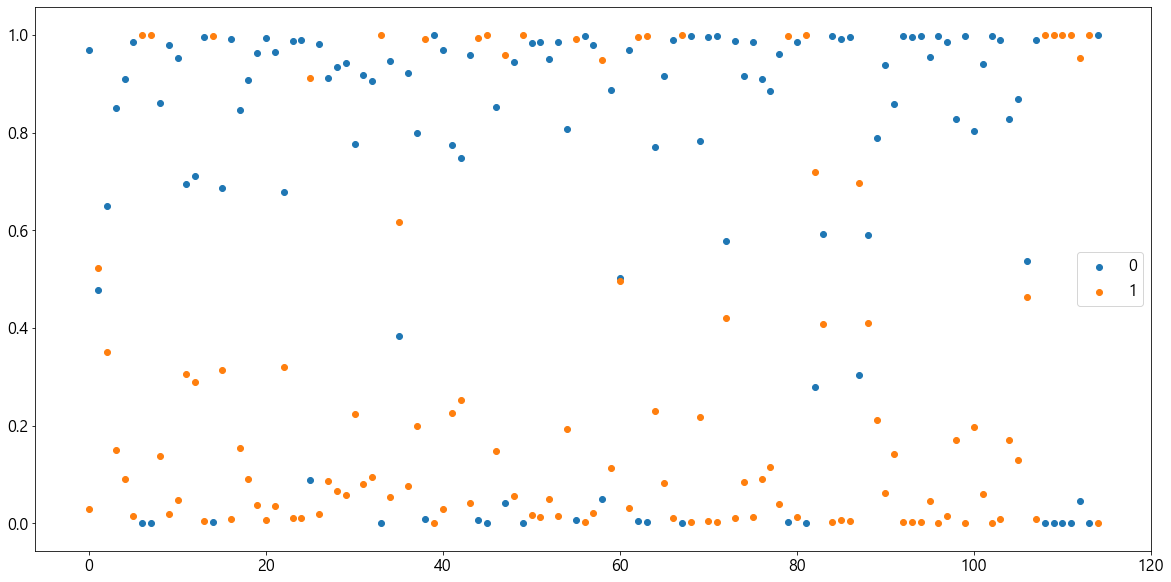

In [79]:
# 0부터 시작해서 전체 데이터의 개수가 들어있는 리스트를 생성한다.
a100 = list(range(len(proba_df['0'])))

plt.scatter(a100, proba_df['0'], label='0')
plt.scatter(a100, proba_df['1'], label='1')
plt.legend()
plt.show()

In [80]:
# 결과데이터 복원
result100 = new_encoder1.inverse_transform(pred2)
result100

array(['benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'beni

In [81]:
# 결과 저장
df2['target'] = result100
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330,benign
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,malignant
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220,benign
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788,benign
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,benign


In [82]:
# 저장한다.
df2.to_csv('data/breast_cancer_result.csv')